# **STUDY ON CART ABANDONMENT**

**INTRODUCTION**

Shopping cart abandonment refers to the phenomenon where customers add items to an online shopping cart, but then leave the site without completing the purchase. This is a common issue faced by e-commerce businesses, as it can result in a significant loss of potential revenue. Studies have shown that the average shopping cart abandonment rate is around 69%, which means that nearly 7 out of 10 customers do not complete their purchases.

**ABOUT DATASET**

Dataset taken here from kaggle consists of **4284 rows and 13 columns**.

Attributes containing in the dataset-

**ID**: The session id of the customer.

**Is_Product_Details_viewed**: Whether the customer is viewing the product details or not.

**Session_Activity_Count**: How many times a customer is going to the different pages.

**No_Items_Added_InCart**: Number of items in cart.

**No_Items_Removed_FromCart**: Number of items removed from the cart.

**No_Cart_Viewed**: How many times the customer is going to the cart page.

**No_Checkout_Confirmed**: How many times the checkout has been confirmed successfully by the customer.

**No_Checkout_Initiated**: How many times the checkout(successful as well as unsuccess) is being done by the user.

**No_Cart_Items_Viewed**: How many times a user is viewing the product from cart.

**No_Customer_Login**: Number of times the customer had did log in.

**No_Page_Viewed**: Number of pages viewed by the customer. 

**Customer_Segment_Type**: The customer falls under which category,i.e, 0 for Target Customer, 1 for Loyal Customer, and 2 for Untargeted customer.

**Cart_Abandoned**: Whether the customer is doing cart abandonment or not. This is the target variable that we need to predict.

**IMPORTING LIBRARIES**

In [130]:
import pickle as pkl
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from scipy.special import boxcox1p
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

**UNDERSTANDING THE DATA**

In [131]:
dataset = pd.read_csv('./cart_abandonment_data.csv')
dataset.head()

,ID,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
0,Session_ID_0,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
1,Session_ID_1,No,38,0.0,0,2.0,0,0,2,0,2,0,1
2,Session_ID_2,No,8,5.0,0,0.0,1,1,1,0,0,1,0
3,Session_ID_3,No,6,0.0,0,2.0,0,0,4,0,0,0,1
4,Session_ID_4,Yes,31,14.0,12,1.0,0,0,4,0,0,2,1


In [132]:
dataset.shape

(4284, 13)

In [133]:
dataset.dtypes

ID                            object
Is_Product_Details_viewed     object
Session_Activity_Count         int64
No_Items_Added_InCart        float64
No_Items_Removed_FromCart      int64
No_Cart_Viewed               float64
No_Checkout_Confirmed          int64
No_Checkout_Initiated          int64
No_Cart_Items_Viewed           int64
No_Customer_Login              int64
No_Page_Viewed                 int64
Customer_Segment_Type          int64
Cart_Abandoned                 int64
dtype: object

In [134]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         4284 non-null   object 
 1   Is_Product_Details_viewed  4284 non-null   object 
 2   Session_Activity_Count     4284 non-null   int64  
 3   No_Items_Added_InCart      4275 non-null   float64
 4   No_Items_Removed_FromCart  4284 non-null   int64  
 5   No_Cart_Viewed             4275 non-null   float64
 6   No_Checkout_Confirmed      4284 non-null   int64  
 7   No_Checkout_Initiated      4284 non-null   int64  
 8   No_Cart_Items_Viewed       4284 non-null   int64  
 9   No_Customer_Login          4284 non-null   int64  
 10  No_Page_Viewed             4284 non-null   int64  
 11  Customer_Segment_Type      4284 non-null   int64  
 12  Cart_Abandoned             4284 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage:

In [135]:
dataset.describe()

,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
count,4284.000000,4275.000000,4284.000000,4275.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000
mean,13.878151,3.488421,0.867180,1.444211,0.187208,0.980159,2.295985,0.169234,2.348506,0.563259,0.856209
std,15.934084,6.789401,3.070022,2.082496,0.517691,1.140525,6.052666,0.400299,2.868862,0.703856,0.350918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,10.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,17.000000,5.000000,0.000000,2.000000,0.000000,1.000000,2.000000,0.000000,3.000000,1.000000,1.000000
max,436.000000,225.000000,50.000000,34.000000,11.000000,14.000000,256.000000,3.000000,35.000000,2.000000,1.000000


In [136]:
dataset.Cart_Abandoned=pd.Categorical(dataset.Cart_Abandoned)
dataset.Cart_Abandoned.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [137]:
dataset.Customer_Segment_Type=pd.Categorical(dataset.Customer_Segment_Type)

In [138]:
dataset.dtypes

ID                             object
Is_Product_Details_viewed      object
Session_Activity_Count          int64
No_Items_Added_InCart         float64
No_Items_Removed_FromCart       int64
No_Cart_Viewed                float64
No_Checkout_Confirmed           int64
No_Checkout_Initiated           int64
No_Cart_Items_Viewed            int64
No_Customer_Login               int64
No_Page_Viewed                  int64
Customer_Segment_Type        category
Cart_Abandoned               category
dtype: object

**COUNT PLOT OF NUMBER OF ABANDONED CARTS**

<Axes: ylabel='count'>

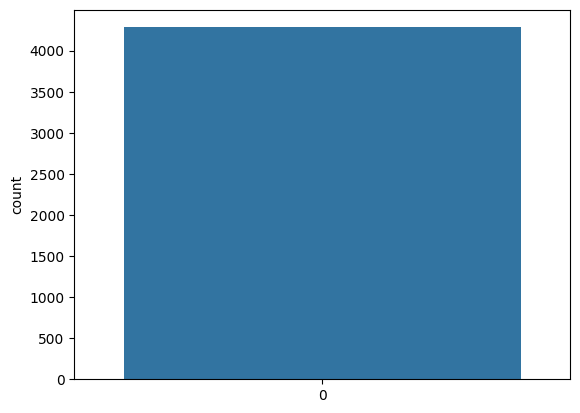

In [139]:
sns.countplot(dataset.Cart_Abandoned)

**EXPLORATORY DATA ANALYSIS**



*   UNIVARIATE ANALYSIS




In [140]:
num=dataset.select_dtypes(include=["float64","int64"])
cat=dataset.select_dtypes(include=["object","category"]).drop(["ID"],axis=1)

In [141]:
num.shape

(4284, 9)

1.FOR NUMERICAL VARIABLES

array([[<Axes: title={'center': 'Session_Activity_Count'}>,
        <Axes: title={'center': 'No_Items_Added_InCart'}>,
        <Axes: title={'center': 'No_Items_Removed_FromCart'}>],
       [<Axes: title={'center': 'No_Cart_Viewed'}>,
        <Axes: title={'center': 'No_Checkout_Confirmed'}>,
        <Axes: title={'center': 'No_Checkout_Initiated '}>],
       [<Axes: title={'center': 'No_Cart_Items_Viewed'}>,
        <Axes: title={'center': 'No_Customer_Login'}>,
        <Axes: title={'center': 'No_Page_Viewed'}>]], dtype=object)

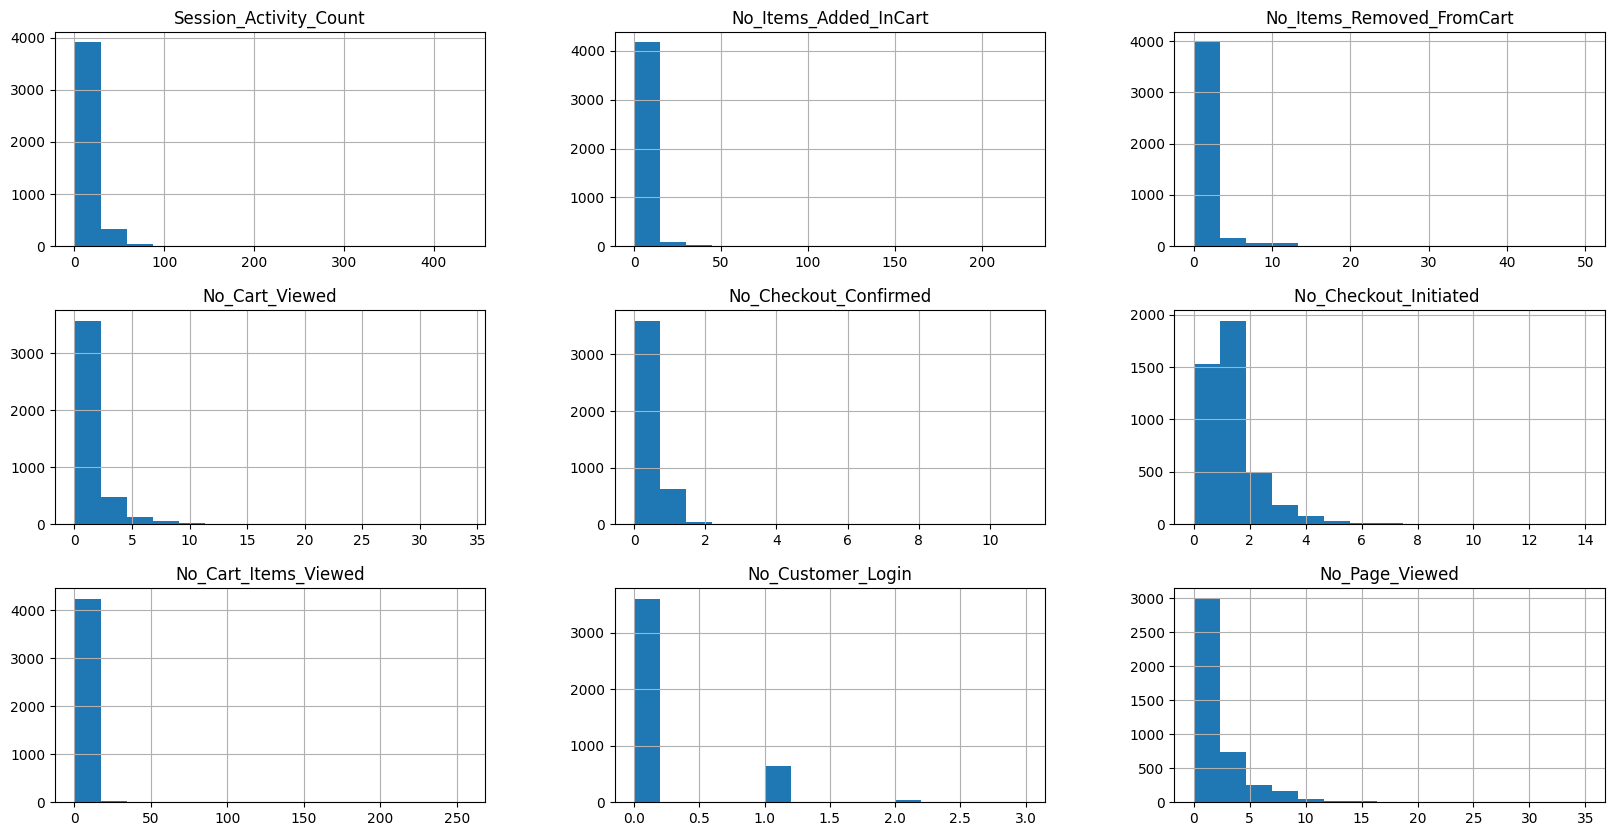

In [142]:
num.hist(bins=15, figsize=(20, 10), layout=(3,3))

2.FOR CATEGORICAL VARIABLES

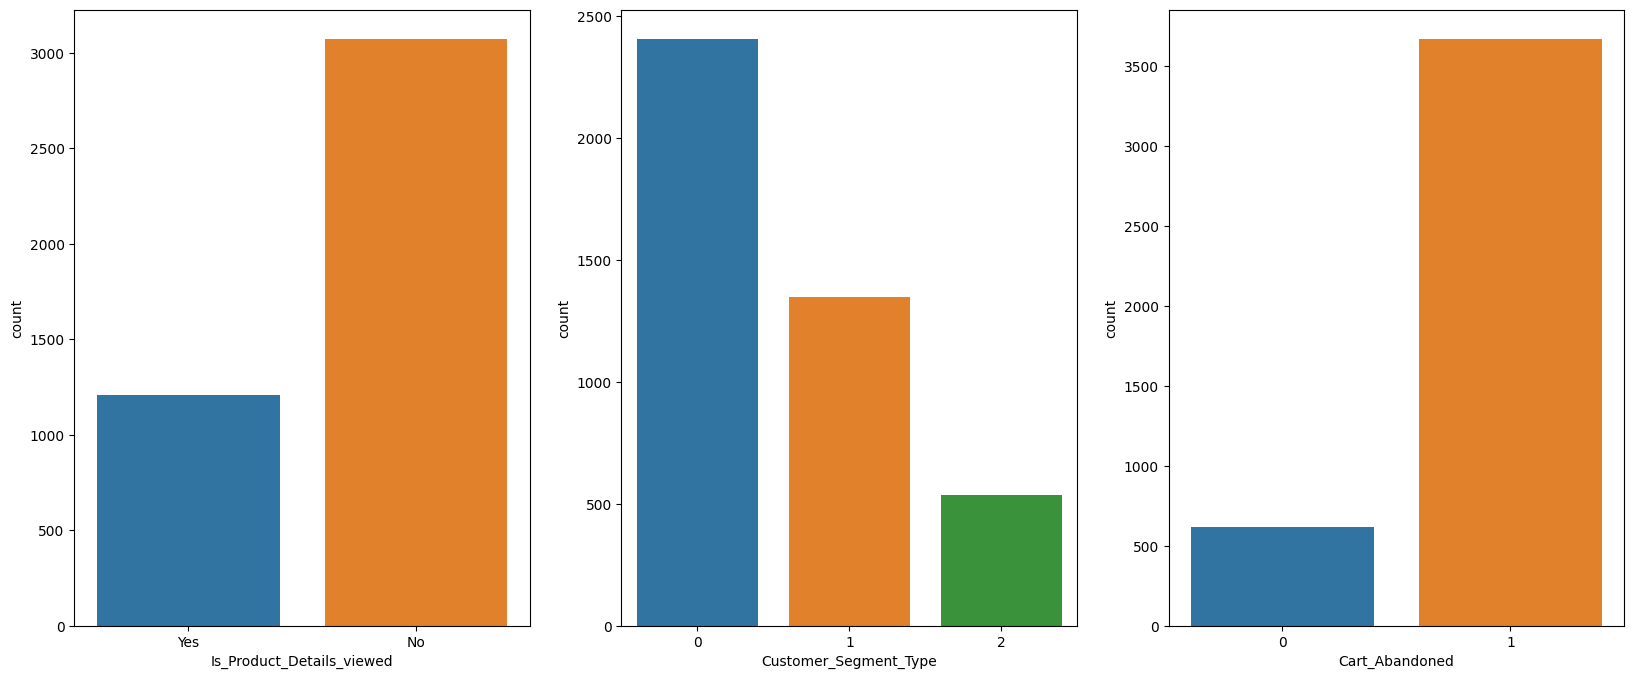

In [143]:
f, ax = plt.subplots(nrows=1,ncols=3,figsize=(20, 8))
for i,j in zip(cat.columns.tolist(), ax.flatten()):
    sns.countplot(x=cat[i],ax=j)

* BIVARIATE ANALYSIS

1. FOR CATEGORICAL ATTRIBUTES

<Axes: xlabel='Is_Product_Details_viewed', ylabel='count'>

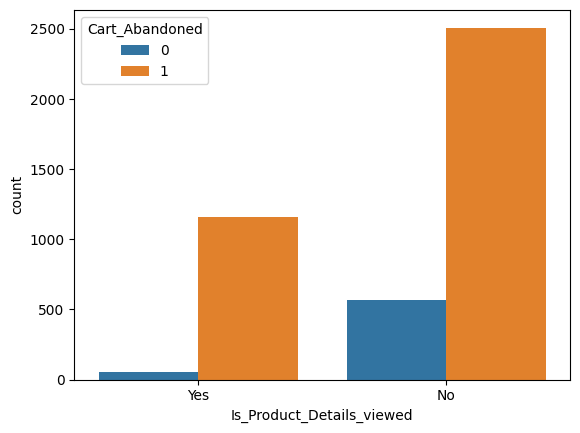

In [144]:
sns.countplot(x=dataset.Is_Product_Details_viewed,hue=dataset.Cart_Abandoned)

<Axes: xlabel='Customer_Segment_Type', ylabel='count'>

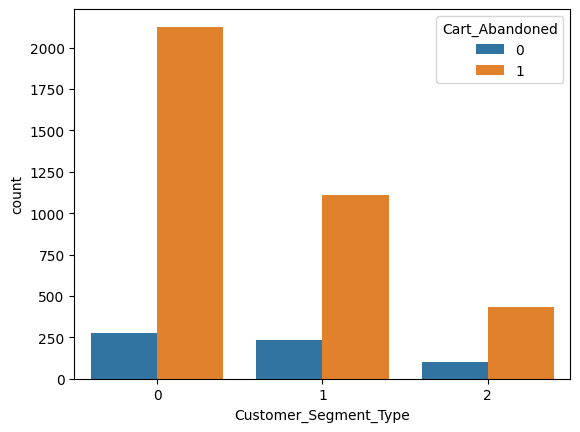

In [145]:
sns.countplot(x=dataset.Customer_Segment_Type,hue=dataset.Cart_Abandoned)

2. FOR NUMERICAL ATTRIBUTES

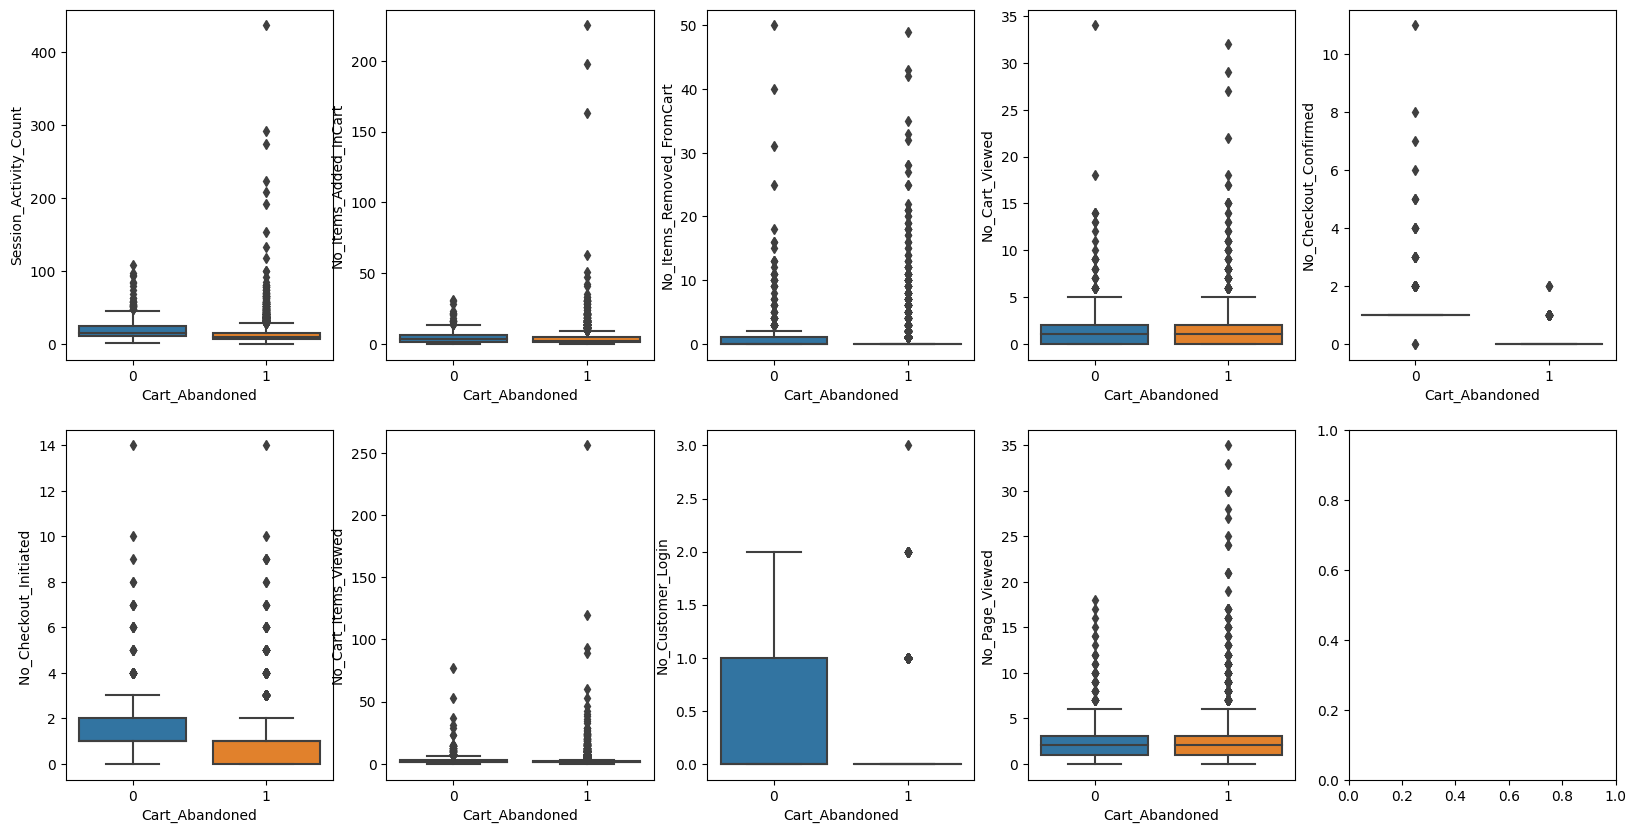

In [146]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for var, subplot in zip(num.columns.tolist(), ax.flatten()):
    sns.boxplot(x=cat["Cart_Abandoned"], y=num[var], ax=subplot)

**CORELATION PLOT OF INDEPENDENT ATTRIBUTES**

<Axes: >

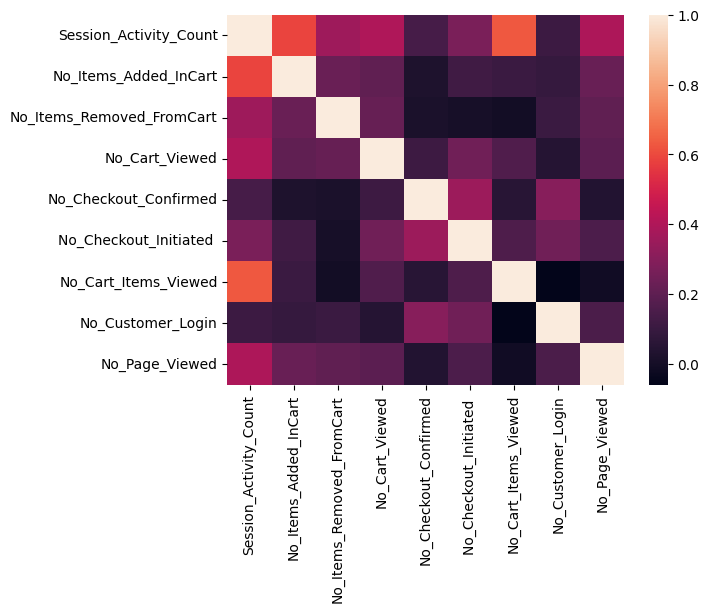

In [147]:
corr = num.corr()
sns.heatmap(corr)

**DATA PREPARATION**

* FINDING NA VALUES FROM DATASET

In [148]:
data = dataset.copy()
data.isna().sum()

ID                           0
Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        9
No_Items_Removed_FromCart    0
No_Cart_Viewed               9
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64

In [149]:
#COLUMNS WHICH HAVE NA VALUES
null_col = data.columns[data.isna().any()].tolist()
null_col

['No_Items_Added_InCart', 'No_Cart_Viewed']

* REPLACING NA VALUES WITH RESPECTIVE COLUMN MEAN

In [150]:
data['No_Items_Added_InCart'] = data['No_Items_Added_InCart'].fillna(data['No_Items_Added_InCart'].mean()) 
data['No_Cart_Viewed'] = data['No_Cart_Viewed'].fillna(data['No_Cart_Viewed'].mean()) 

In [151]:
data[null_col] = data[null_col].astype("int64")

In [152]:
#CHECKING IF STILL ANY NA VALUES PRESENT
data.isna().sum()

ID                           0
Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        0
No_Items_Removed_FromCart    0
No_Cart_Viewed               0
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64

1. TAKING CARE OF OUTLIERS USING MIN-MAX NORMALISATION

In [153]:
num=data.select_dtypes(include=["int64"])
cat=data.select_dtypes(include=["object","category"]).drop(["ID"],axis=1)

In [154]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(num)
x_scaled

array([[0.00917431, 0.00444444, 0.        , ..., 0.00390625, 0.        ,
        0.        ],
       [0.08715596, 0.        , 0.        , ..., 0.0078125 , 0.        ,
        0.05714286],
       [0.01834862, 0.02222222, 0.        , ..., 0.00390625, 0.        ,
        0.        ],
       ...,
       [0.00917431, 0.00444444, 0.        , ..., 0.00390625, 0.        ,
        0.        ],
       [0.01834862, 0.01333333, 0.        , ..., 0.00390625, 0.        ,
        0.05714286],
       [0.07110092, 0.01777778, 0.        , ..., 0.02734375, 0.        ,
        0.02857143]])

In [155]:
#NORMALISED DATA
df_scaled = pd.DataFrame(x_scaled,columns=num.columns)
df_scaled.head()

,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed
0,0.009174,0.004444,0.00,0.000000,0.000000,0.000000,0.003906,0.0,0.000000
1,0.087156,0.000000,0.00,0.058824,0.000000,0.000000,0.007812,0.0,0.057143
2,0.018349,0.022222,0.00,0.000000,0.090909,0.071429,0.003906,0.0,0.000000
3,0.013761,0.000000,0.00,0.058824,0.000000,0.000000,0.015625,0.0,0.000000
4,0.071101,0.062222,0.24,0.029412,0.000000,0.000000,0.015625,0.0,0.000000


array([[<Axes: title={'center': 'Session_Activity_Count'}>,
        <Axes: title={'center': 'No_Items_Added_InCart'}>,
        <Axes: title={'center': 'No_Items_Removed_FromCart'}>],
       [<Axes: title={'center': 'No_Cart_Viewed'}>,
        <Axes: title={'center': 'No_Checkout_Confirmed'}>,
        <Axes: title={'center': 'No_Checkout_Initiated '}>],
       [<Axes: title={'center': 'No_Cart_Items_Viewed'}>,
        <Axes: title={'center': 'No_Customer_Login'}>,
        <Axes: title={'center': 'No_Page_Viewed'}>]], dtype=object)

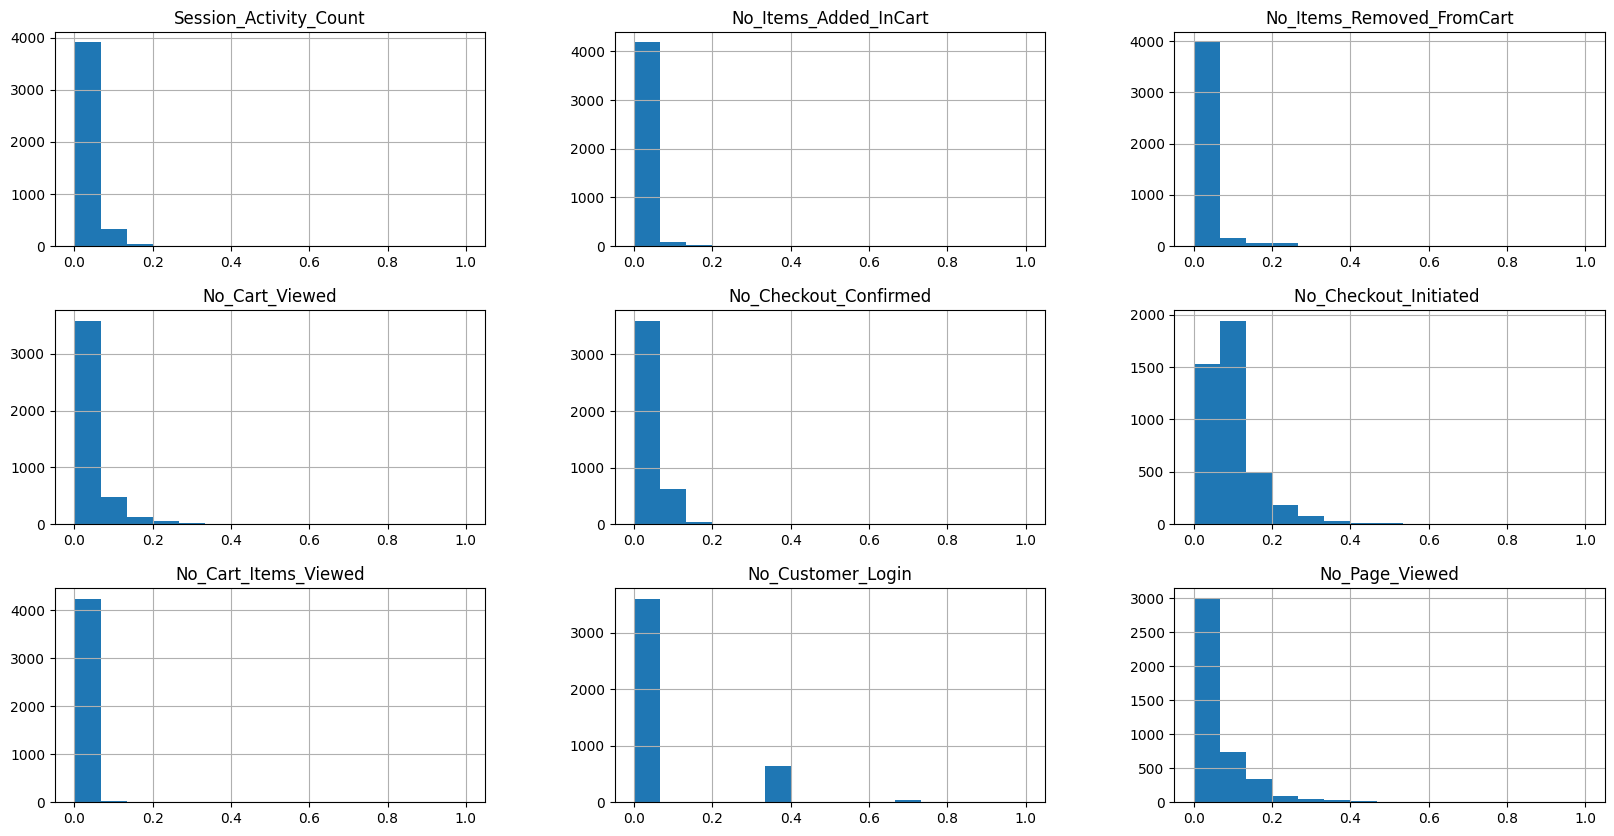

In [156]:
#DATA VISUALIZATION FOR NORMALISED DATA
df_scaled.hist(bins=15, figsize=(20, 10), layout=(3,3))

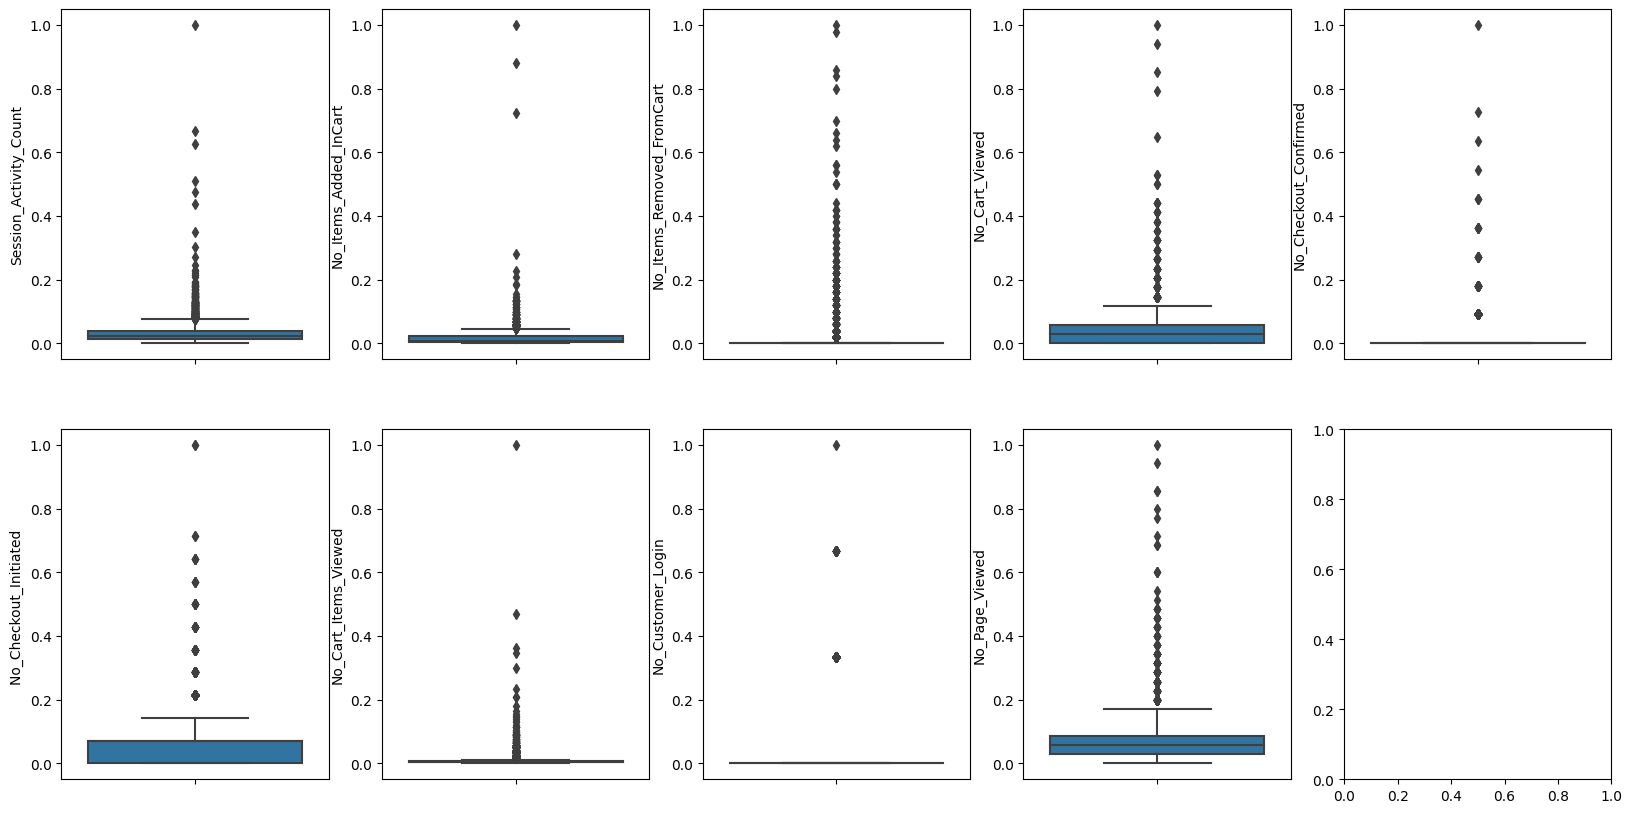

In [157]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for var, subplot in zip(df_scaled.columns.tolist(), ax.flatten()):
    sns.boxplot(y=df_scaled[var], ax=subplot)

2. TAKING CARE OF OUTLIERS USING BOX-COX NORMALISATION

In [158]:
df_scaled_boxcox=boxcox1p(num, 0)

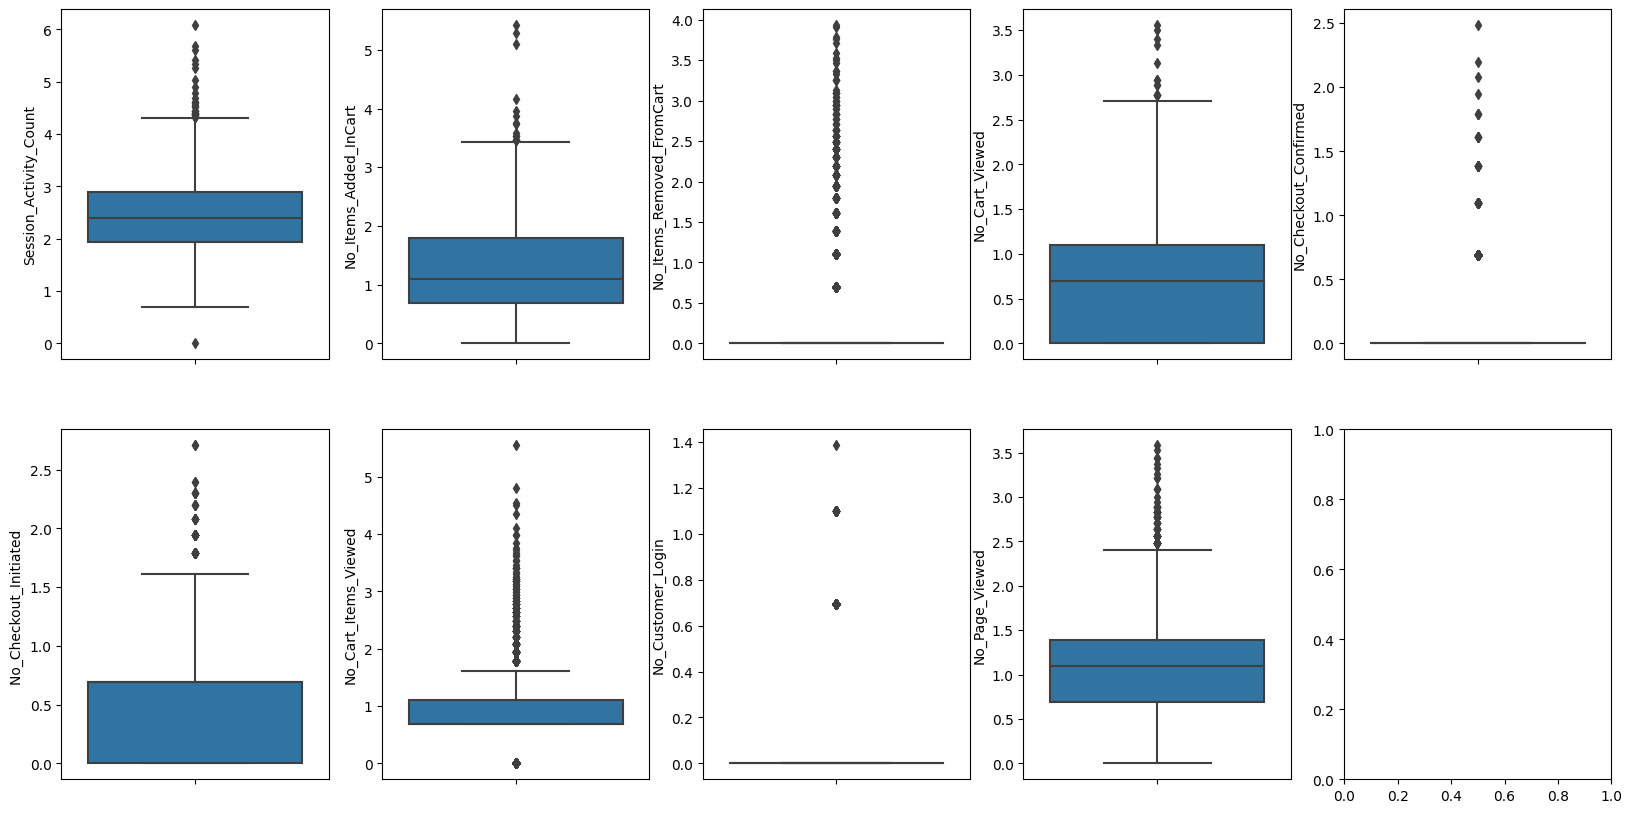

In [159]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for var, subplot in zip(df_scaled_boxcox.columns.tolist(), ax.flatten()):
    sns.boxplot(y=df_scaled_boxcox[var], ax=subplot)

array([[<Axes: title={'center': 'Session_Activity_Count'}>,
        <Axes: title={'center': 'No_Items_Added_InCart'}>,
        <Axes: title={'center': 'No_Items_Removed_FromCart'}>,
        <Axes: title={'center': 'No_Cart_Viewed'}>,
        <Axes: title={'center': 'No_Checkout_Confirmed'}>],
       [<Axes: title={'center': 'No_Checkout_Initiated '}>,
        <Axes: title={'center': 'No_Cart_Items_Viewed'}>,
        <Axes: title={'center': 'No_Customer_Login'}>,
        <Axes: title={'center': 'No_Page_Viewed'}>, <Axes: >]],
      dtype=object)

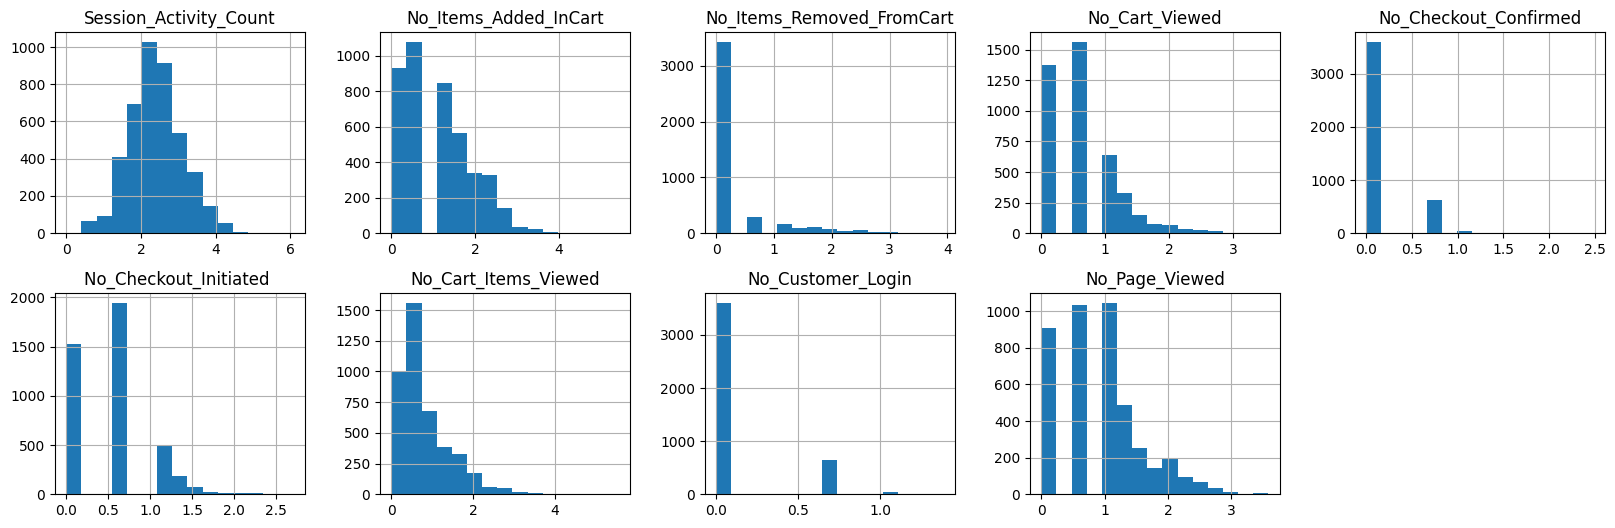

In [160]:
df_scaled_boxcox.hist(bins=15, figsize=(20, 6), layout=(2, 5))

In [161]:
df_scaled_boxcox.shape

(4284, 9)

In [162]:
df_scaled_boxcox.head()

,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed
0,1.609438,0.693147,0.000000,0.000000,0.000000,0.000000,0.693147,0.0,0.000000
1,3.663562,0.000000,0.000000,1.098612,0.000000,0.000000,1.098612,0.0,1.098612
2,2.197225,1.791759,0.000000,0.000000,0.693147,0.693147,0.693147,0.0,0.000000
3,1.945910,0.000000,0.000000,1.098612,0.000000,0.000000,1.609438,0.0,0.000000
4,3.465736,2.708050,2.564949,0.693147,0.000000,0.000000,1.609438,0.0,0.000000


In [163]:
df_scaled_boxcox["ID"]=data.ID
df_scaled_boxcox.set_index('ID',inplace=True)

In [164]:
df_scaled_boxcox.reset_index(inplace=True)

In [165]:
df_final=df_scaled_boxcox.join(cat)
df_final.head(3)

,ID,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Is_Product_Details_viewed,Customer_Segment_Type,Cart_Abandoned
0,Session_ID_0,1.609438,0.693147,0.0,0.000000,0.000000,0.000000,0.693147,0.0,0.000000,Yes,0,1
1,Session_ID_1,3.663562,0.000000,0.0,1.098612,0.000000,0.000000,1.098612,0.0,1.098612,No,0,1
2,Session_ID_2,2.197225,1.791759,0.0,0.000000,0.693147,0.693147,0.693147,0.0,0.000000,No,1,0


In [166]:
df_final.Is_Product_Details_viewed.replace({"Yes":1,"No":0},inplace=True)
df_final.head(3)

,ID,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Is_Product_Details_viewed,Customer_Segment_Type,Cart_Abandoned
0,Session_ID_0,1.609438,0.693147,0.0,0.000000,0.000000,0.000000,0.693147,0.0,0.000000,1,0,1
1,Session_ID_1,3.663562,0.000000,0.0,1.098612,0.000000,0.000000,1.098612,0.0,1.098612,0,0,1
2,Session_ID_2,2.197225,1.791759,0.0,0.000000,0.693147,0.693147,0.693147,0.0,0.000000,0,1,0


In [167]:
df_final.dtypes

ID                             object
Session_Activity_Count        float64
No_Items_Added_InCart         float64
No_Items_Removed_FromCart     float64
No_Cart_Viewed                float64
No_Checkout_Confirmed         float64
No_Checkout_Initiated         float64
No_Cart_Items_Viewed          float64
No_Customer_Login             float64
No_Page_Viewed                float64
Is_Product_Details_viewed       int64
Customer_Segment_Type        category
Cart_Abandoned               category
dtype: object

In [168]:
df_final.Is_Product_Details_viewed=pd.Categorical(df_final.Is_Product_Details_viewed)

* FEATURE SELECTION

1. USING RECURSIVE FEATURE ELIMINATION

In [169]:
X=df_final.iloc[:,1:12]
X.shape

(4284, 11)

In [170]:
y=df_final["Cart_Abandoned"]
y.name

'Cart_Abandoned'

In [171]:
lr = LogisticRegression()
lr.fit(X,y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=7, verbose = 3 )
fit=rfe.fit(X,y)
print("Num Features: %d"% fit.n_features_) 
print("Selected Features: %s"% fit.support_) 
print("Feature Ranking: %s"% fit.ranking_)

Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Num Features: 7
Selected Features: [ True False False  True  True  True False  True  True  True False]
Feature Ranking: [1 2 4 1 1 1 5 1 1 1 3]


In [172]:
l = [i for i,x in enumerate(list(fit.support_)) if x == True]

In [173]:
X.columns

Index(['Session_Activity_Count', 'No_Items_Added_InCart',
       'No_Items_Removed_FromCart', 'No_Cart_Viewed', 'No_Checkout_Confirmed',
       'No_Checkout_Initiated ', 'No_Cart_Items_Viewed', 'No_Customer_Login',
       'No_Page_Viewed', 'Is_Product_Details_viewed', 'Customer_Segment_Type'],
      dtype='object')

In [174]:
feature_selected = [X[X.columns[l[i]]].name for i,x in enumerate(l)]

In [175]:
#SELECTED FEATURES
feature_selected

['Session_Activity_Count',
 'No_Cart_Viewed',
 'No_Checkout_Confirmed',
 'No_Checkout_Initiated ',
 'No_Customer_Login',
 'No_Page_Viewed',
 'Is_Product_Details_viewed']

2. USING RANDOM FOREST CLASSIFIER

In [176]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X, y)
feature_weightage_dict = dict()
# Print the name and gini importance of each feature
for feature in zip(X.columns, clf.feature_importances_):
    feature_weightage_dict.update({feature[0]:feature[1]})

In [177]:
feature_weightage_dict

{'Session_Activity_Count': 0.05052857005529642,
 'No_Items_Added_InCart': 0.025547984898027527,
 'No_Items_Removed_FromCart': 0.010172300692196705,
 'No_Cart_Viewed': 0.017810335296951977,
 'No_Checkout_Confirmed': 0.7341868777064404,
 'No_Checkout_Initiated ': 0.0441808380652188,
 'No_Cart_Items_Viewed': 0.018703955749515146,
 'No_Customer_Login': 0.05604221107820115,
 'No_Page_Viewed': 0.027120211503535017,
 'Is_Product_Details_viewed': 0.009764913736069736,
 'Customer_Segment_Type': 0.0059418012185472185}

In [178]:
sorted_feature_weightage_dict = sorted(feature_weightage_dict.items(), key=lambda kv: kv[1], reverse = True)

In [179]:
#FEATURES WEIGHTAGE IN DECREASING ORDER
sorted_feature_weightage_dict

[('No_Checkout_Confirmed', 0.7341868777064404),
 ('No_Customer_Login', 0.05604221107820115),
 ('Session_Activity_Count', 0.05052857005529642),
 ('No_Checkout_Initiated ', 0.0441808380652188),
 ('No_Page_Viewed', 0.027120211503535017),
 ('No_Items_Added_InCart', 0.025547984898027527),
 ('No_Cart_Items_Viewed', 0.018703955749515146),
 ('No_Cart_Viewed', 0.017810335296951977),
 ('No_Items_Removed_FromCart', 0.010172300692196705),
 ('Is_Product_Details_viewed', 0.009764913736069736),
 ('Customer_Segment_Type', 0.0059418012185472185)]

In [180]:
df_final.columns

Index(['ID', 'Session_Activity_Count', 'No_Items_Added_InCart',
       'No_Items_Removed_FromCart', 'No_Cart_Viewed', 'No_Checkout_Confirmed',
       'No_Checkout_Initiated ', 'No_Cart_Items_Viewed', 'No_Customer_Login',
       'No_Page_Viewed', 'Is_Product_Details_viewed', 'Customer_Segment_Type',
       'Cart_Abandoned'],
      dtype='object')

In [247]:
df_final.shape

(4284, 13)

### From above two feature selection methods we can say No_Items_Added_InCart, No_Checkout_Confirmed, No_Checkout_Initiated, No_Customer_Login and No_Page_Viewed has higher importance features.So we consider that attributes only to train our model

**TRAIN VALIDATION SPLIT**

In [255]:
X = df_final.iloc[:,[5,6,8,9,2]]
y = df_final.loc[:,["Cart_Abandoned"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [256]:
print(X_train.shape)
y_train.shape

(2998, 5)


(2998, 1)

**OVERSAMPLING USING SMOTE**

In [257]:
sm = SMOTE(random_state=2,k_neighbors=5)
X_train, y_train =sm.fit_resample(X_train,y_train)

In [258]:
X_train.shape

(5146, 5)

**TRAIN-TEST SPLIT AFTER SMOTE**

In [259]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.30, random_state=0)

In [275]:
import warnings
warnings.filterwarnings('ignore')

## **MODEL BUILDING AND PREDICTION**

### Using logistic Regression

In [273]:
lr1 = LogisticRegression()
lr1.fit(X_train_new,y_train_new)

y_pred_lr=lr1.predict(X_test_new)           # For actual validation samples
print(accuracy_score(y_test_new,y_pred_lr))

0.9863989637305699


### Using SVM with rbf kernel

In [274]:
from sklearn.svm import SVC
clf1 = SVC(kernel='linear')
clf1.fit(X_train_new,y_train_new)
y_pred_svc = clf1.predict(X_test_new)
print(accuracy_score(y_test_new,y_pred_svc))

0.9870466321243523


### Using Multi-Layer Perceptron

In [277]:
from sklearn.neural_network import MLPClassifier
clf2 = MLPClassifier(hidden_layer_sizes=(100,30),max_iter=300)
clf2.fit(X_train_new,y_train_new)
y_pred_mlp = clf2.predict(X_test_new)
print(accuracy_score(y_test_new,y_pred_mlp))

0.9876943005181347


### Using Ada Boost Classifier

In [278]:
from sklearn.ensemble import AdaBoostClassifier
clf3 = AdaBoostClassifier(n_estimators=500,learning_rate=1,random_state=1234)
clf3.fit(X_train_new,y_train_new)
y_pred_boost = clf3.predict(X_test_new)
print(accuracy_score(y_test_new,y_pred_boost))

0.9889896373056994


## **CONCLUSION**

### By using this analysis we can predict whether a customer will do abandonment or not in the future. So that we can able to give them some offers so that they able to complete the checkout successfully.